## Importing Library

In [31]:
import pandas as pd
import numpy as np


## Data Ingestion 

In [32]:
df = pd.read_csv('players_22.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_21932\3399434548.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


## Taking particualr column only

In [33]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [34]:
players = df.dropna(subset = features)

In [35]:
df = players[features].copy()

In [36]:
df.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [37]:
df.tail()

,overall,potential,wage_eur,value_eur,age
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19
19238,47,60,500.0,110000.0,19


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   wage_eur   19165 non-null  float64
 3   value_eur  19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB


In [39]:
df.columns

Index(['overall', 'potential', 'wage_eur', 'value_eur', 'age'], dtype='object')

In [40]:
df.shape

(19165, 5)

## High level steps for the algorithm implementation

# 1. Scale data to standardize values

# 2. Initialize random centroids

# 3. Get labels of each data point

# 4. Create new centroids

# 5. Plot the centroids

# 6. Repeat 3-5 until the centroids stop changing

In [41]:
df = ((df - df.min()) / (df.max() - df.min())) * 10 + 1

In [42]:
df.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [43]:
df.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [44]:
# setting up the random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [45]:
centroids = random_centroids(df, 5)

C:\Users\PC\AppData\Local\Temp\ipykernel_21932\291553174.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [46]:
centroids

,0,1,2,3,4
overall,4.260870,6.217391,5.782609,4.260870,8.608696
potential,5.130435,6.434783,4.913043,5.347826,6.869565
wage_eur,1.472103,1.042918,1.000000,1.157368,1.014306
value_eur,1.061395,1.051085,1.031754,1.195421,1.030465
age,2.481481,4.333333,4.333333,2.851852,7.296296


In [47]:
def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [48]:
labels = get_labels(df, centroids)

In [49]:
labels.value_counts()


2    5746
1    5091
3    5058
4    1651
0    1619
Name: count, dtype: int64

In [50]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [52]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

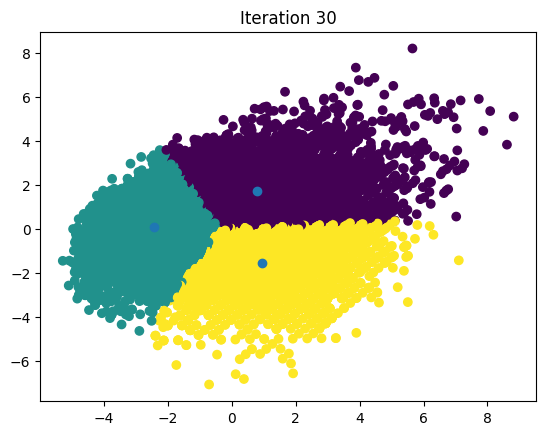

In [53]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [54]:
# finding out the centroids
centroids


,0,1,2
overall,6.324628,3.436536,5.200636
potential,7.100439,5.357557,4.894208
wage_eur,1.456630,1.031374,1.130961
value_eur,1.311183,1.029343,1.049892
age,3.874397,2.674807,5.963956


In [55]:
# counting the value for each labels
labels.value_counts()

2    7188
1    6162
0    5815
Name: count, dtype: int64

In [56]:
## setting up the short name and its features
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13267,K. Nagera,63,80,8000.0,1300000.0,19
13351,Llabrés,63,81,3000.0,1200000.0,19
14026,M. Azeez,62,83,4000.0,1300000.0,18
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [57]:
from sklearn.cluster import KMeans


In [58]:
# setting up the 
kmeans = KMeans(3)
kmeans.fit(df)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [59]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T


,0,1,2
overall,3.883944,5.224288,6.804961
potential,5.670138,4.893849,7.243801
wage_eur,1.044120,1.125548,1.726920
value_eur,1.039595,1.044476,1.457732
age,2.900733,6.122884,4.484800
